# Excercise 2a
Authors: Moro Palma Loris, Vedasri Nakka, Mirko Bristle, Alexandra Kovacs, Michael Brunner


Deadline: April 19, 2021 (end of day) With this exercise we want you to build the foundation for your Pattern Recognition Framework.
To do this you should still work on the MNIST dataset, with which you should be familiar by now.
In this exercise you should aim to improve the recognition rate on the MNIST dataset using SVM.

Discuss a good architecture for your framework so that you can reuse software components in later exercises.

- Reminder: As already discussed. From now on you are free to either implement algorithms on your own or use any kinds of libraries.

## SVM

Use the provided training set to build your SVM.
Apply the trained SVM to classify the test set.
Investigate at least two diﬀerent kernels and optimize the SVM parameters by means of cross-validation.

## Expected Output
• Access to your GitHub so that we can inspect your code.

• Small report in PDF / README format on the GitHub containing:

– Average accuracy during cross-validation for all investigated kernels (e.g. linear and RBF) and all parameter values (e.g. C and γ ).

– Accuracy on the test set with the optimized parameter values.


In [22]:
import pandas as pd
train_data = pd.read_csv("data/mnist-csv-format/mnist_train.csv", header=0)
test_data = pd.read_csv("data/mnist-csv-format/mnist_test.csv", header=0)

train_y = train_data.iloc[:,0].to_numpy()
train_x = train_data.iloc[:,1:].to_numpy()

test_y = test_data.iloc[:,0].to_numpy()
test_x = test_data.iloc[:,1:].to_numpy()

In [23]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


def preprocessing_crossvalidation_svm():
    steps = [('scaler', MinMaxScaler()), ('SVM', SVC())]
    pipeline = Pipeline(steps)

    # Set the parameters by cross-validation

    tuning_parameters = [
        {'SVM__kernel': ['rbf'], 'SVM__gamma': [1e-1, 1e-2, 1e-3], 'SVM__C': [1e-1, 1, 10, 100, 1000]},
        {'SVM__kernel': ['linear'], 'SVM__C': [1e-1, 1, 10, 100, 1000]}]

    clf = GridSearchCV(pipeline, param_grid=tuning_parameters, scoring='accuracy', n_jobs=-1, cv=5)
    clf.fit(train_x, train_y)

    print("Mean accuracy on development set:")
    print()
    means = clf.cv_results_['mean_test_score']

    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"% (mean, params))

    print()
    print(f"The optimal parameters are: {clf.best_params_}")
    return clf.best_estimator_

clf_optimized = preprocessing_crossvalidation_svm()

Mean accuracy on development set:

0.453 for {'SVM__C': 0.1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
0.938 for {'SVM__C': 0.1, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
0.882 for {'SVM__C': 0.1, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
0.914 for {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
0.966 for {'SVM__C': 1, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
0.923 for {'SVM__C': 1, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
0.918 for {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
0.973 for {'SVM__C': 10, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
0.944 for {'SVM__C': 10, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
0.918 for {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
0.974 for {'SVM__C': 100, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
0.955 for {'SVM__C': 100, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
0.918 for {'SVM__C': 1000, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
0.974 for {'SVM__C': 1000, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
0.955 for {'SVM__C': 

In [24]:
from sklearn.metrics import accuracy_score

clf_optimized.fit(train_x, train_y)
test_pred_y = clf_optimized.predict(test_x)
acc = accuracy_score(test_y, test_pred_y)
print(f"The accuracy on the test set with optimized parameters is: {round(acc*100,2)} %")

The accuracy on the test set with optimized parameters is: 97.69 %


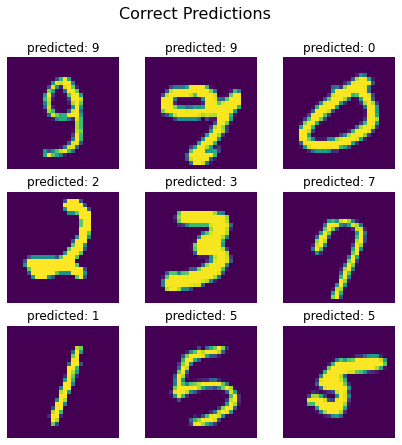

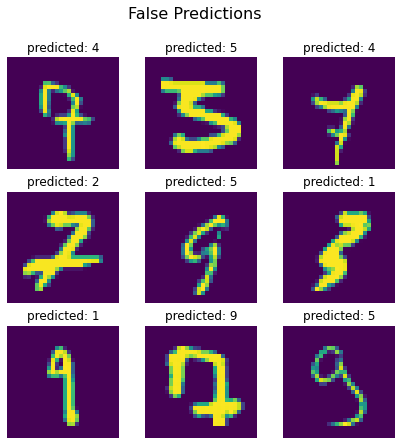

In [25]:
import matplotlib.pyplot as plt
import random as rnd

correct_prediction = [i for i in range(test_x.shape[0]) if test_y[i]==test_pred_y[i]]
false_prediction = [i for i in range(test_x.shape[0]) if test_y[i]!=test_pred_y[i]]

fig=plt.figure(figsize=(7, 7))
for k,v in enumerate([rnd.choice(correct_prediction) for i in range(9)]):
    img = np.reshape(test_x[v],(28,28))
    fig.add_subplot(3, 3, k+1)
    fig.suptitle("Correct Predictions", fontsize=16)
    plt.title('predicted: {0}'. format(test_pred_y[v]))
    plt.axis('off')
    plt.imshow(img)

fig=plt.figure(figsize=(7, 7))
for k,v in enumerate([rnd.choice(false_prediction) for i in range(9)]):
    img = np.reshape(test_x[v],(28,28))
    fig.add_subplot(3, 3, k+1)
    fig.suptitle("False Predictions", fontsize=16)
    plt.title('predicted: {0}'. format(test_pred_y[v]))
    plt.axis('off')
    plt.imshow(img)